# Linear Regression – Uber Fare Prediction

This noteboook contains a custom implementation of the **Linear Regression** algorithm from scratch, developed as part of the `rice_ml` package for the INDE577/CMOR438 Machine Learning Final Project.

The model estimates the fare amount of Uber rides based on trip-related and temporal features, using standard gradient descent for parameter estimation. No external ML libraries (e.g., scikit-learn) were used in the core model.


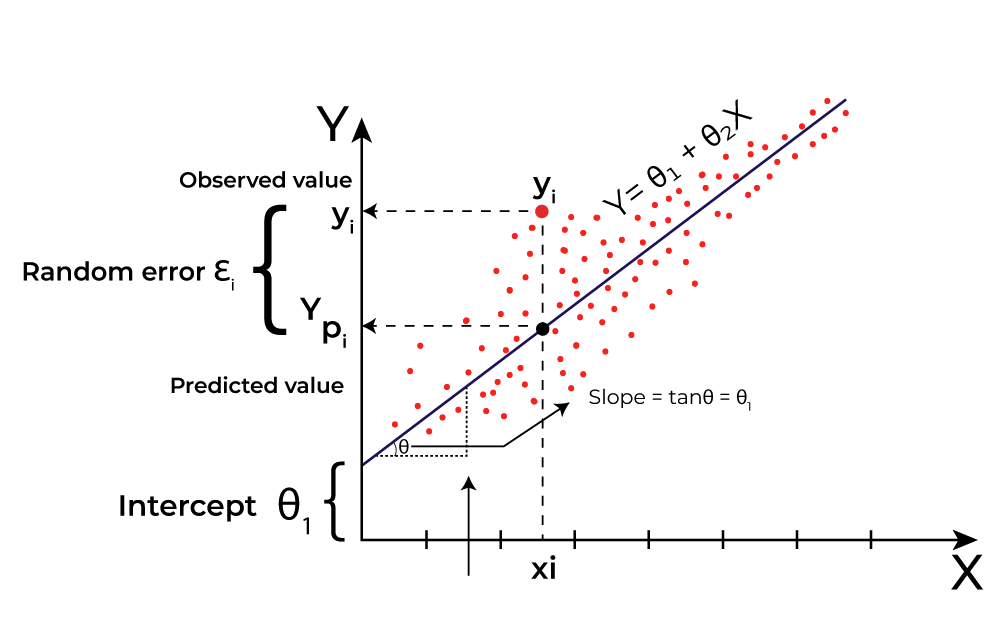

This linear regression model is trained using gradient descent to minimize the Mean Squared Error (MSE) between the predicted fare and the actual fare. The algorithm learns the best-fitting line by iteratively updating the intercept (θ₁) and slope (θ₂) to reduce the average squared distance between the red data points and the blue prediction line. Each red point represents an observed fare, and the vertical distance to the line indicates the prediction error (εᵢ).

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

csv_path = "/content/drive/MyDrive/Colab Notebooks/ML_Rice_2025_Final_Project/uber.csv"

df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Cloning into 'INDE577_ML_Rice_2025'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 172 (delta 79), reused 74 (delta 24), pack-reused 0 (from 0)
Receiving objects: 100% (172/172), 464.37 KiB | 2.34 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Linear Regression model loaded.


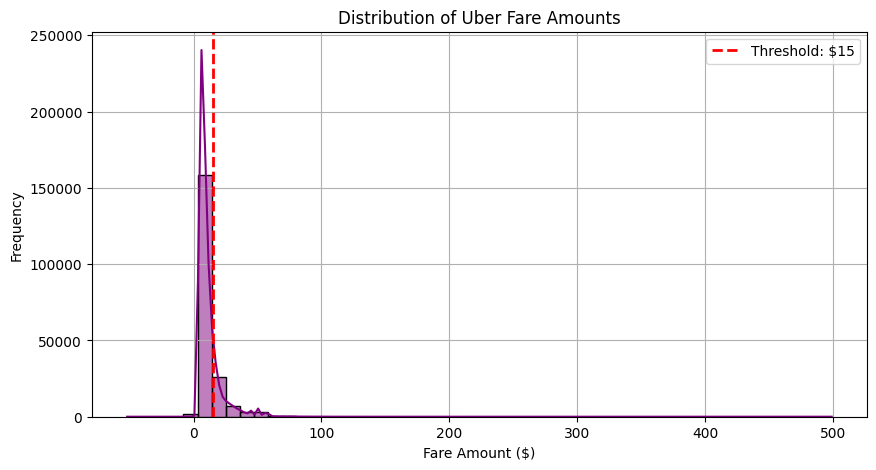

Test MSE: 49.06
R² Score: 0.3983


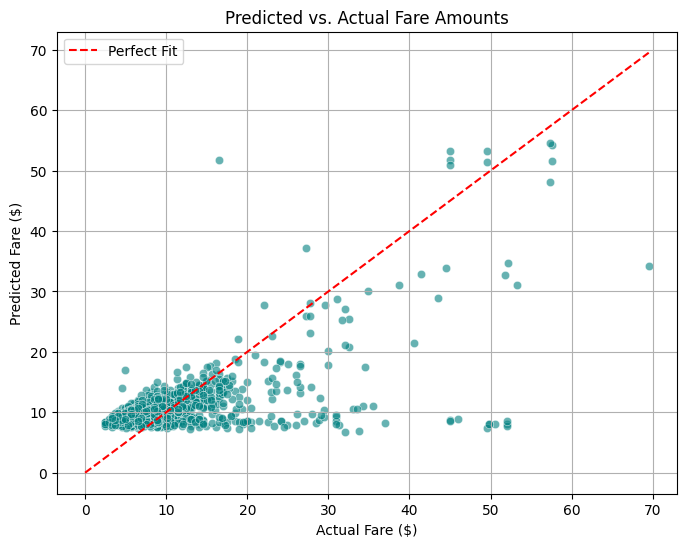


Top Predictors (by absolute weight):
dropoff_longitude        : -205.7490
pickup_longitude         : 192.0925
dropoff_latitude         : 149.4139
pickup_latitude          : -140.0490
manhattan_distance       : 121.8599
is_weekend               : -0.4081
dayofweek                : 0.3543
passenger_count          : 0.1688
hour_exact               : -0.1046
hour_exact_x_passenger   : -0.1025

Note: This Linear Regression model is implemented from scratch via the custom rice_ml package.
Hopefully the effort is appreciated!


In [9]:
# Step 1: Clone & Import Package
!rm -rf INDE577_ML_Rice_2025
!git clone https://github.com/alicewang777/INDE577_ML_Rice_2025.git

import sys
sys.path.append('/content/INDE577_ML_Rice_2025')

from rice_ml.linear_regression import LinearRegression
from rice_ml.metrics import mse, r2_score
print("Linear Regression model loaded.")

# Step 2: Load Dataset
import pandas as pd
csv_path = "/content/drive/MyDrive/Colab Notebooks/ML_Rice_2025_Final_Project/uber.csv"
df = pd.read_csv(csv_path)

# Step 3: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True, color="purple")
plt.axvline(x=15, color='red', linestyle='--', linewidth=2, label='Threshold: $15')
plt.title("Distribution of Uber Fare Amounts")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Feature Engineering
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df[(df['pickup_longitude'] != 0) & (df['dropoff_longitude'] != 0)].copy()
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df.dropna().copy()

df.loc[:, 'minute'] = df['pickup_datetime'].dt.minute
df.loc[:, 'hour_exact'] = df['pickup_datetime'].dt.hour + df['minute'] / 60.0
df.loc[:, 'dayofweek'] = df['pickup_datetime'].dt.dayofweek
df.loc[:, 'is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
df.loc[:, 'hour_exact_x_passenger'] = df['hour_exact'] * df['passenger_count']
df.loc[:, 'manhattan_distance'] = (
    np.abs(df['pickup_longitude'] - df['dropoff_longitude']) +
    np.abs(df['pickup_latitude'] - df['dropoff_latitude'])
)

df = df[df['fare_amount'] < 100].copy()
df = df.sample(n=5000, random_state=42)

features = [
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
    'passenger_count', 'hour_exact', 'dayofweek', 'is_weekend',
    'hour_exact_x_passenger', 'manhattan_distance'
]
X_raw = df[features].values
y = df['fare_amount'].values  # Note: Now we predict fare_amount directly (regression)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression Model from rice_ml
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict + Evaluate
y_pred = model.predict(X_test)

mse_val = mse(y_test, y_pred)
r2_val = r2_score(y_test, y_pred)

print(f"Test MSE: {mse_val:.2f}")
print(f"R² Score: {r2_val:.4f}")

# Step 7: Visualization of Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title("Predicted vs. Actual Fare Amounts")
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Coefficients
coeffs = model.weights
coef_summary = sorted(zip(features, coeffs), key=lambda x: abs(x[1]), reverse=True)
print("\nTop Predictors (by absolute weight):")
for name, w in coef_summary:
    print(f"{name:<25}: {w:.4f}")

# Optional Final Comment
print("\nNote: This Linear Regression model is implemented from scratch via the custom rice_ml package.")
print("Hopefully the effort is appreciated!")


# **Model Performance Summary**

The Linear Regression model captures general fare trends but underestimates higher fare amounts, as seen in the scatter plot. The model achieves an R² of about 0.40, indicating moderate fit. Geolocation features (like dropoff_longitude and pickup_longitude) show the strongest influence, which makes sense because location heavily impacts ride distance and fare. However, the presence of large weights on both positive and negative directions suggests some multicollinearity or overfitting, especially given the simplicity of the linear model. This model serves as a solid baseline, but there’s room to improve prediction accuracy using more flexible models.